In [1]:
import tensorflow as tf

In [2]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape,y_train.shape

11490434/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,))

이미지 데이터는 픽셀단위로 되어 있고 각 픽셀은 0 ~ 255 사이

In [5]:
x_train = x_train / 255.0
x_test = x_test / 255.0

모델구성 - funtional api
  - 입력층
  - 입력층으로부터 1차원으로 변경하는 flatten
  - Dense - sigmoid or relu
  - Dense - sigmoid or relu
  - 출력을 담당하는 Dense - softmax

In [35]:
def makeModel():
  inputs = tf.keras.Input(shape=(28,28))
  x = tf.keras.layers.Flatten()(inputs)
  x = tf.keras.layers.Dense(100,activation='relu',name = 'input_layer')(x)
  x = tf.keras.layers.Dense(50,activation='relu',name = 'hidden_layer_1')(x)
  outputs = tf.keras.layers.Dense(10,activation='softmax',name = 'output_layer')(x)
  model = tf.keras.Model(inputs = inputs, outputs=outputs,name='my_model')
  return model
model = makeModel()
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 input_layer (Dense)         (None, 100)               78500     
                                                                 
 hidden_layer_1 (Dense)      (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.get_layer("input_layer")  # 확인 필요

In [26]:
# 학습방법을 정의
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics='accuracy')
# 학습
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2566 - accuracy: 0.9251
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1163 - accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0877 - accuracy: 0.9741
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0713 - accuracy: 0.9792
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0606 - accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0536 - accuracy: 0.9847
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0457 - accuracy: 0.9867
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0409 - accuracy: 0.9887
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0360 - accuracy: 0.9895
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.031

In [ ]:
history.history

학습과정 시각화

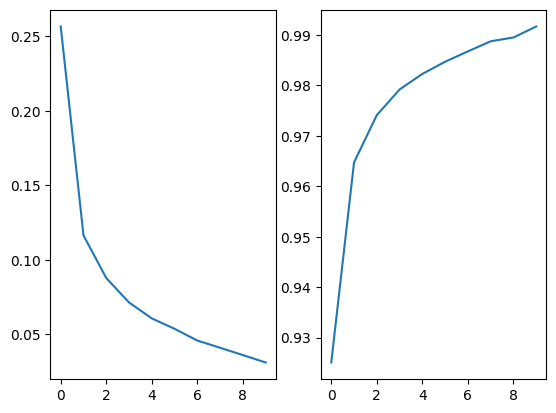

In [31]:
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.show()

에포크를 증가하면?

In [32]:
# 추가학습
history = model.fit(x_train,y_train,epochs=20,verbose=0)

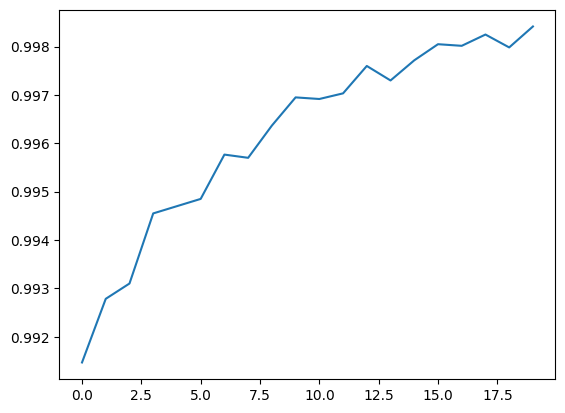

In [34]:
plt.plot(history.history['accuracy'])
plt.show()

매 학습마다 검증데이터를 사용해서 각 과적합 및 기타 정보

In [36]:
model = makeModel()
# 학습방법을 정의
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, metrics='accuracy')
# 학습시 훈련데이터와 검증 데이터를 동시에 사용
# 검증데이터를 만들기 위해 기존 학습데이터를 분할
from sklearn.model_selection import train_test_split
x_train2,x_val,y_train2,y_val =  train_test_split(x_train,y_train)
x_train2.shape,x_val.shape,y_train2.shape,y_val.shape

((45000, 28, 28), (15000, 28, 28), (45000,), (15000,))

In [38]:
history = model.fit(x_train2,y_train2,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2849 - accuracy: 0.9174 - val_loss: 0.1874 - val_accuracy: 0.9450
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1299 - accuracy: 0.9611 - val_loss: 0.1240 - val_accuracy: 0.9638
Epoch 3/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0925 - accuracy: 0.9726 - val_loss: 0.1112 - val_accuracy: 0.9685
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0742 - accuracy: 0.9785 - val_loss: 0.1018 - val_accuracy: 0.9702
Epoch 5/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0608 - accuracy: 0.9824 - val_loss: 0.0950 - val_accuracy: 0.9731
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9848 - val_loss: 0.1049 - val_accuracy: 0.9709
Epoch 7/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0439 - accuracy: 0.9870 - val_loss: 0.1072 - val_accuracy:

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

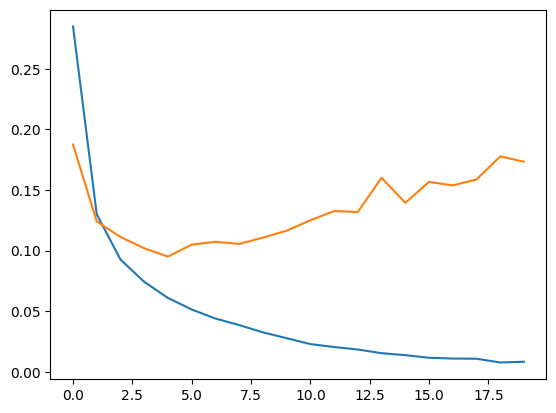

In [40]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.show()


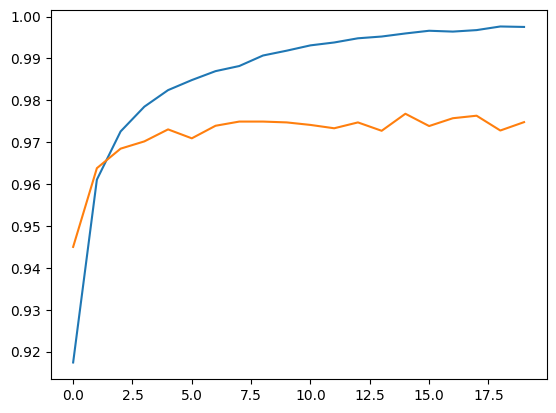

In [41]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.show()


In [43]:
model.layers

In [47]:
previous_layer = model.layers[2]
previous_layer, previous_layer.output

(<keras.layers.core.dense.Dense at 0x7ffa55f04dc0>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'input_layer')>)

In [48]:
dropout_layer = tf.keras.layers.Dropout(0.25)(previous_layer.output)

In [49]:
new_layer = tf.keras.layers.Dense(previous_layer.units,activation=previous_layer.activation)(dropout_layer)

In [50]:
new_model = tf.keras.Model(inputs=model.input, outputs=new_layer)
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 input_layer (Dense)         (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
Total params: 88,600
Trainable params: 88,600
Non-trainable params: 0
_________________________________________________________________


In [52]:
inputs = tf.keras.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100,activation='relu',name = 'input_layer')(x)
x = tf.keras.layers.Dropout(0.25)(x)  # 과적합을 피하기위해서 신경망 규제기법
x = tf.keras.layers.Dense(50,activation='relu',name = 'hidden_layer_1')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax',name = 'output_layer')(x)
new_model2 = tf.keras.Model(inputs = inputs, outputs=outputs,name='my_model')
new_model2.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,  metrics='accuracy')
history = new_model2.fit(x_train2,y_train2,epochs=20,validation_data=(x_val,y_val))

Epoch 1/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.3699 - accuracy: 0.8902 - val_loss: 0.1991 - val_accuracy: 0.9396
Epoch 2/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1875 - accuracy: 0.9449 - val_loss: 0.1289 - val_accuracy: 0.9627
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1509 - accuracy: 0.9553 - val_loss: 0.1127 - val_accuracy: 0.9665
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1327 - accuracy: 0.9618 - val_loss: 0.1090 - val_accuracy: 0.9683
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1214 - accuracy: 0.9656 - val_loss: 0.1007 - val_accuracy: 0.9709
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1133 - accuracy: 0.9674 - val_loss: 0.1067 - val_accuracy: 0.9699
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1069 - accuracy: 0.9700 - val_loss: 0.0962 - val_accuracy:

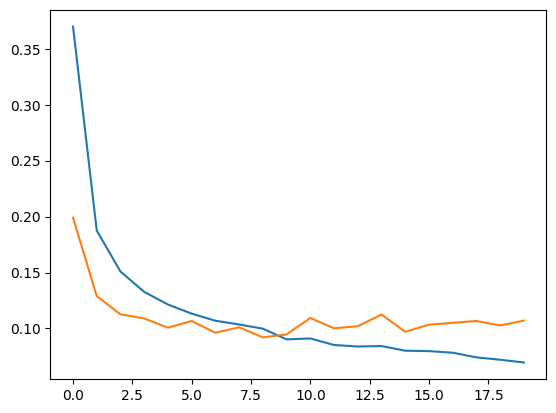

In [53]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.show()

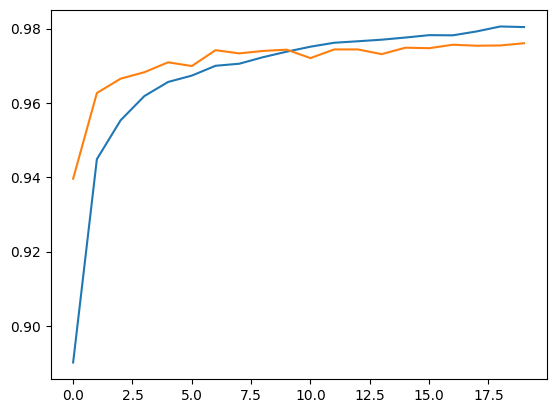

In [54]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.show()

In [55]:
new_model2.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9761


[0.10913492739200592, 0.9761000275611877]

모델 저장 및 복원

In [56]:
new_model2.save_weights('model_weight.h5')

In [ ]:
new_model2.load_weights('model_weight.h5')
# compile을 지정하고 fit을 해야 추가 학습이 가능

In [57]:
new_model2.save('model_whole.h5')
new_model3 = tf.keras.models.load_model('model_whole.h5')

In [58]:
new_model3.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1091 - accuracy: 0.9761


[0.10913492739200592, 0.9761000275611877]

- 함수
  - 생성한 함수는 사용자가 직접호출하는 방식
- 콜백
  - 사용자가 함수를 제공하면.. 시스템이 적당한 시점에 알아서 호출
  - Event Function
    - 키보드를 클릭하면, 마우스를 움직이면, 왼쪽버튼을 클릭하면...


In [60]:
# 모델학습이 끝나면 알아서 모델을 저장해라..
# 저장될 파일명을 제공
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_model.h5')

In [61]:
inputs = tf.keras.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100,activation='relu',name = 'input_layer')(x)
x = tf.keras.layers.Dropout(0.25)(x)  # 과적합을 피하기위해서 신경망 규제기법
x = tf.keras.layers.Dense(50,activation='relu',name = 'hidden_layer_1')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax',name = 'output_layer')(x)
checkpoint_model = tf.keras.Model(inputs = inputs, outputs=outputs,name='my_model')
checkpoint_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,  metrics=['accuracy'])
history = checkpoint_model.fit(x_train2,y_train2,epochs=20,validation_data=(x_val,y_val), callbacks=[checkpoint_cb])

Epoch 1/20
1407/1407 [==============================] - 4s 2ms/step - loss: 0.3616 - accuracy: 0.8924 - val_loss: 0.1737 - val_accuracy: 0.9483
Epoch 2/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1898 - accuracy: 0.9437 - val_loss: 0.1415 - val_accuracy: 0.9585
Epoch 3/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1549 - accuracy: 0.9546 - val_loss: 0.1202 - val_accuracy: 0.9655
Epoch 4/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1387 - accuracy: 0.9598 - val_loss: 0.1137 - val_accuracy: 0.9663
Epoch 5/20
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1249 - accuracy: 0.9644 - val_loss: 0.1162 - val_accuracy: 0.9674
Epoch 6/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1147 - accuracy: 0.9673 - val_loss: 0.0971 - val_accuracy: 0.9728
Epoch 7/20
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1028 - accuracy: 0.9704 - val_loss: 0.0967 - val_accuracy:

In [62]:
#  load to best model
best_model = tf.keras.models.load_model('best_model.h5')
best_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1043 - accuracy: 0.9776


[0.1043064296245575, 0.9775999784469604]

조기종료 Early Stopping

In [63]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

In [64]:
inputs = tf.keras.Input(shape=(28,28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100,activation='relu',name = 'input_layer')(x)
x = tf.keras.layers.Dropout(0.25)(x)  # 과적합을 피하기위해서 신경망 규제기법
x = tf.keras.layers.Dense(50,activation='relu',name = 'hidden_layer_1')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax',name = 'output_layer')(x)
checkpoint_model = tf.keras.Model(inputs = inputs, outputs=outputs,name='my_model')
checkpoint_model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,  metrics=['accuracy'])
history = checkpoint_model.fit(x_train2,y_train2,epochs=100,validation_data=(x_val,y_val), callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
1407/1407 [==============================] - 4s 2ms/step - loss: 0.3673 - accuracy: 0.8911 - val_loss: 0.1774 - val_accuracy: 0.9460
Epoch 2/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1950 - accuracy: 0.9430 - val_loss: 0.1343 - val_accuracy: 0.9588
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1537 - accuracy: 0.9548 - val_loss: 0.1159 - val_accuracy: 0.9651
Epoch 4/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1355 - accuracy: 0.9596 - val_loss: 0.1171 - val_accuracy: 0.9654
Epoch 5/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1233 - accuracy: 0.9648 - val_loss: 0.1033 - val_accuracy: 0.9702
Epoch 6/100
1407/1407 [==============================] - 3s 2ms/step - loss: 0.1135 - accuracy: 0.9679 - val_loss: 0.1047 - val_accuracy: 0.9707
Epoch 7/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1074 - accuracy: 0.9687 - val_loss: 0.1051 - val_ac

In [65]:
early_stopping_cb.stopped_epoch

6

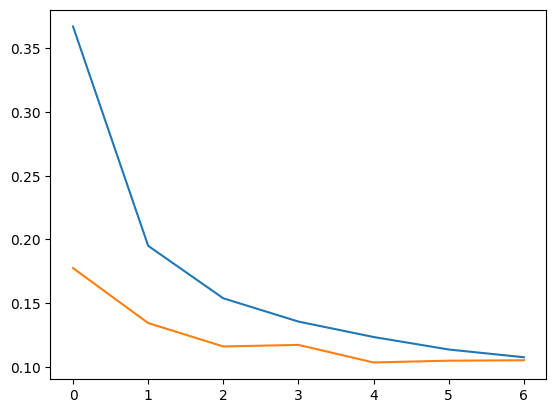

In [67]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.show()

In [9]:
class TempClass():
  def __init__(self) -> None:
    pass
  def __call__(self,x):
    print("호출되었습니다")

In [12]:
TempClass()(10)


호출되었습니다


In [68]:
checkpoint_model.layers

In [69]:
checkpoint_model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 input_layer (Dense)         (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 50)                5050      
                                                                 
 output_layer (Dense)        (None, 10)                510       
                                                                 
Total params: 84,060
Trainable params: 84,060
Non-trainabl

In [79]:
add_layer = checkpoint_model.layers[-2].output

In [80]:
new_layer = tf.keras.layers.Dropout(0.5)(add_layer)
new_layer

<KerasTensor: shape=(None, 50) dtype=float32 (created by layer 'dropout_6')>

In [81]:
outputs = checkpoint_model.layers[-1](new_layer)

In [82]:
new_model = tf.keras.Model(inputs=checkpoint_model.inputs,outputs=outputs)

In [83]:
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 input_layer (Dense)         (None, 100)               78500     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 50)                5050      
                                                                 
 dropout_6 (Dropout)         (None, 50)                0         
                                                                 
 output_layer (Dense)        (None, 10)                510 

기존 모델에 레이아웃을 추가하는 방법
  - 모델을 불러온다.
  - layers()를 이용해서 추가하려는 레이어 인덱스 번호를 취득한다
  - 추가하려는 레이어를 만들고 funtional api방식으로 추가
    - 새로운 레이어(추가하려는 레이어)
  - 나머지도 같이 연결

In [87]:
inputs = tf.keras.Input(shape = (28,28))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(100,activation='sigmoid')(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs)
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [91]:
add_poin_layer = model.layers[-2].output
dropout_layer = tf.keras.layers.Dropout(0.25)(add_poin_layer)
outputs = model.layers[-1]
outputs = outputs(dropout_layer)

In [92]:
model2 = tf.keras.Model(inputs = model.input, outputs = outputs)
model2.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 100)               78500     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
